In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

In [3]:
from profanity import profanity

In [4]:
profanity.contains_profanity("fuck all these people")

True

In [5]:
import praw

reddit = praw.Reddit(
    client_id="IISZRvsPo8OBGV06-x_D1Q",
    client_secret="sX4K-1ciu8fAIer3m0KHMy2riJs0yw",
    user_agent="Python:SIN project:v1.0 (by /u/Mundane_Trick3335)",
)

In [6]:
print(reddit.read_only)

True


In [7]:
for submission in reddit.subreddit("test").hot(limit=10):
    print(submission.title)

test
Some test commands
Test
Test post image and text
Cat snack | @nafan_tik
Cat snack | Nafantik 🐾
Котячі ласощі | Cat snack | Nafantik 🐾
Котячі ласощі | Cat snack | Nafantik 🐾
Test Connection Post
Testing


In [8]:
prolife_subreddits = [                                         
    "prolife",    
    "MarchForLife",    
    "Abortiondebate",    
    "ProLifeLibertarians",    
    "AbolishAbortion",       
    "StudentsForLife",              
    "RightToLife",                    
    "AbortionRegret",                                
    "RealProLife",           
    "ProLifeMemes",           
    "ProLifeVegan" 
]

In [9]:
pro_choice_subreddits = [                                                   
    "prochoice",    
    "abortion",    
    "PlannedParenthood",    
    "ReproJustice",       
    "BirthControl",                          
    "LateTermAbortion",
    "AbortionAccess",    
    "MyBodyMyChoice",
    "WomenHealthcare",        
    "reproductivejustice",    
    "ReproductiveRights",        
]

In [10]:
mixed = [
    "SocialJustice",    
    "Activism", 
    "Progressive",
    "Abortiondebate",
    "WomensHealth",
    "Healthcare",
    "Feminism",    
    "FeministTheory",
    "EqualRights",
    "TwoXChromosomes",
    "r/PlannedParenthood"
]

In [11]:
combined_list=prolife_subreddits+pro_choice_subreddits+mixed

In [12]:

tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-stance-abortion')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-stance-abortion')

In [13]:
def relevant_comment(text):
    keywords = ["pro-life", "pro-choice", "abortion", "fetus", "pregnancy", "reproductive rights", "women's rights", "roe v. wade", "contraception", "termination", "embryo", "planned parenthood", "ultrasound", "adoption", "parental", "consent", "incest", "rape", "maternal", "unsafe", "anti-choice", "healthcare access", "education", "teen pregnancy", "ife", "abortion pill", "late-term", "back-alley", "health"]
    new_keywords = ["heartbeat","brain","conception","ban","child", "access", "reproductive", "healthcare", "women's autonomy", "rights","women", "personhood", "sanctity of life", "conscience clause", "abortion restriction", "procedure","quality","child","children","development","functioning"]
    final_keywords=keywords+new_keywords
    for word in keywords:
        if word in text.lower():
            return True
    return False


In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-stance-abortion')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-stance-abortion')

def classify(tok):
    tokens = tokenizer.encode(tok, return_tensors='pt')

    return int(torch.argmax(model(tokens).logits))


def sentiment_score(comment):
    tokens = tokenizer.encode(comment, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [15]:
sentiment_score("My favourite comparison is It's my car, it's my alcohol, I can drive drunk. If you're so worried, drive sober and put on your seatbelt.")

1

In [16]:
file = open('prochoice.txt', 'w+')

In [17]:
combined_list

['prolife',
 'MarchForLife',
 'Abortiondebate',
 'ProLifeLibertarians',
 'AbolishAbortion',
 'StudentsForLife',
 'RightToLife',
 'AbortionRegret',
 'RealProLife',
 'ProLifeMemes',
 'ProLifeVegan',
 'prochoice',
 'abortion',
 'PlannedParenthood',
 'ReproJustice',
 'BirthControl',
 'LateTermAbortion',
 'AbortionAccess',
 'MyBodyMyChoice',
 'WomenHealthcare',
 'reproductivejustice',
 'ReproductiveRights',
 'SocialJustice',
 'Activism',
 'Progressive',
 'Abortiondebate',
 'WomensHealth',
 'Healthcare',
 'Feminism',
 'FeministTheory',
 'EqualRights',
 'TwoXChromosomes',
 'r/PlannedParenthood']

In [18]:
total_choice=0
total_life=0
total_all=0

prochoice_prof=0
prolife_prof=0
nonEcho_prof=0

prochoice_comments=0
prolife_comments=0
neutral_comments=0

In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Taking each post from identified subredits and checking for echo chambers

In [20]:
#opening files
# with open('prochoice.txt', 'w') as f:
#     f.write('')
# with open('prolife.txt', 'w') as f:
#     f.write('')
# with open('mixed.txt', 'w') as f:
#     f.write('')
# with open('maindDataset.txt','w') as f:
#     f.write('')

indSubData={}
# dataset= open('maindDataset.txt', 'a+', encoding='utf-8')
#look at each identified subreddit
for subr in combined_list:
    # if subr in pro_choice_subreddits:
         # file = open('prochoice.txt', 'a+')
    # elif subr in prolife_subreddits:
        # file = open('prolife.txt', 'a+')
    # else:
        # file = open('mixed.txt', 'a+')
    subreddit = reddit.subreddit(subr)
    try:
        print(subreddit.title)
        indSubData[subreddit.title]=[]
    except:
        continue
    # dataset.write(subreddit.title+"\n")
    # file.write(subreddit.title+"\n")

    #initializing all variables
    non_echo=0
    choice_echo=0
    life_echo=0
    toxic_comm=0
    
    
    i=1
    #look at each submission in subreddit
    for submission in subreddit.hot(limit=10):
        prof_post=0
        total=0
        choice=0
        life=0
        
        # file.write("Post "+str(i)+": ")
        tok=submission.title
        # dataset.write("Post "+str(i)+": "+tok+"\n")
        if relevant_comment(tok):
            score=sentiment_score(tok[:940])
            total+=1
            if(score==3):
                choice+=1
            elif(score==2):
                life+=1
            if(profanity.contains_profanity(tok)):
                prof_post+=1
        submission.comments.replace_more(limit=None)
        
        j=0
        #look at each comment of submission
        for top_level_comment in submission.comments:
            tok=top_level_comment.body
            j+=1
            # dataset.write("\tcomment "+str(j)+": "+tok+"\n")
            if relevant_comment(tok):
                score=sentiment_score(tok[:940])
                total+=1
                if(score==3):
                    choice+=1
                elif(score==2):
                    life+=1
                if(profanity.contains_profanity(tok)):
                    prof_post+=1
            #look at second level comment of each submission
            for second_level_comment in top_level_comment.replies:
                tok=second_level_comment.body
                j+=1
                # dataset.write("\t comment "+str(j)+": "+tok+"\n")
                if relevant_comment(tok):
                    score=sentiment_score(tok[:940])
                    total+=1
                    if(score==3):
                        choice+=1
                        prochoice_comments+=1
                    elif(score==2):
                        life+=1
                        prolife_comments+=1
                    else:
                        neutral_comments+=1
                    if(profanity.contains_profanity(tok)):
                        prof_post+=1


        #determine if submission is an echo chamber
        # if (total!=0):
            # file.write(str(choice)+" "+str(life)+" "+str(total)+"\n")
        i+=1
        # dataset.write("\n")
        if choice>1 and float(total-life)/(float(total)) > 0.8:
            choice_echo+=1
            prochoice_prof+=prof_post
        elif life>1 and float(total-choice)/(float(total)) > 0.8:
            life_echo+=1
            prolife_prof+=prof_post
        else:
            non_echo+=1 
            nonEcho_prof+=prof_post

    #write to file and print
    total_choice+=choice_echo
    total_life+=life_echo
    total_all+=life_echo+choice_echo+non_echo
    indSubData[subreddit.title].append(choice_echo)
    indSubData[subreddit.title].append(life_echo)
    indSubData[subreddit.title].append(non_echo)
    print("Overall: ",choice_echo,life_echo,non_echo)
    # file.write("Overall: "+str(choice_echo)+" Pro-Choice echo chamber, " + str(life_echo)+" Pro-Life echo chambers, "+str(non_echo)+" No echo chambers\n\n")
    # file.close()
# dataset.close()

with open('subreddit_data.json', 'w') as file:
    json.dump(indSubData, file)

ProLife
Overall:  2 2 6
March for Life
Overall:  0 2 8
Debating Abortion
Overall:  7 0 3
Pro Life Libertarians
Overall:  3 1 6
AbolishAbortion
Overall:  1 0 9
Students for life
Overall:  0 0 1
Right To Life
Overall:  0 1 9
abortionregret
Overall:  0 0 2
Pro-Life Memes
Overall:  1 0 9
ProLifeVegan
Overall:  1 3 6
Pro-choice
Overall:  6 0 4
abortion
Overall:  6 0 4
PlannedParenthood
Overall:  1 0 9
Reproductive Justice, Health, and Activism
Overall:  0 0 10
All things related to birth control
Overall:  2 0 8
latetermabortion
Overall:  0 0 2
abortion access
Overall:  1 0 2
WomenHealthCare
Overall:  1 0 9
Reproductive Justice
Overall:  3 0 7
Social Justice
Overall:  0 0 10
Reddit: Progressive
Overall:  0 0 10
Debating Abortion
Overall:  7 0 3
Women's Health: women's health news, questions and discussion
Overall:  2 0 8
healthcare: systems, costs, problems and proposed solutions.
Overall:  1 0 9
Feminism - “the personal is political” 
Overall:  2 0 8
Feminist Theory
Overall:  0 0 10
Equal R

['1 - ProLife', '2 - March for Life', '3 - Debating Abortion', '4 - Pro Life Libertarians', '5 - AbolishAbortion', '6 - Students for life', '7 - Right To Life', '8 - abortionregret', '9 - Pro-Life Memes', '10 - ProLifeVegan', '11 - Pro-choice', '12 - abortion', '13 - PlannedParenthood', '14 - Reproductive Justice, Health, and Activism', '15 - All things related to birth control', '16 - latetermabortion', '17 - abortion access', '18 - WomenHealthCare', '19 - Reproductive Justice', '20 - Social Justice', '21 - Reddit', "22 - Women's Health", '23 - healthcare', '24 - Feminism - “the personal is political” ', '25 - Feminist Theory', '26 - Equal Rights', '27 - r/TwoXChromosomes']


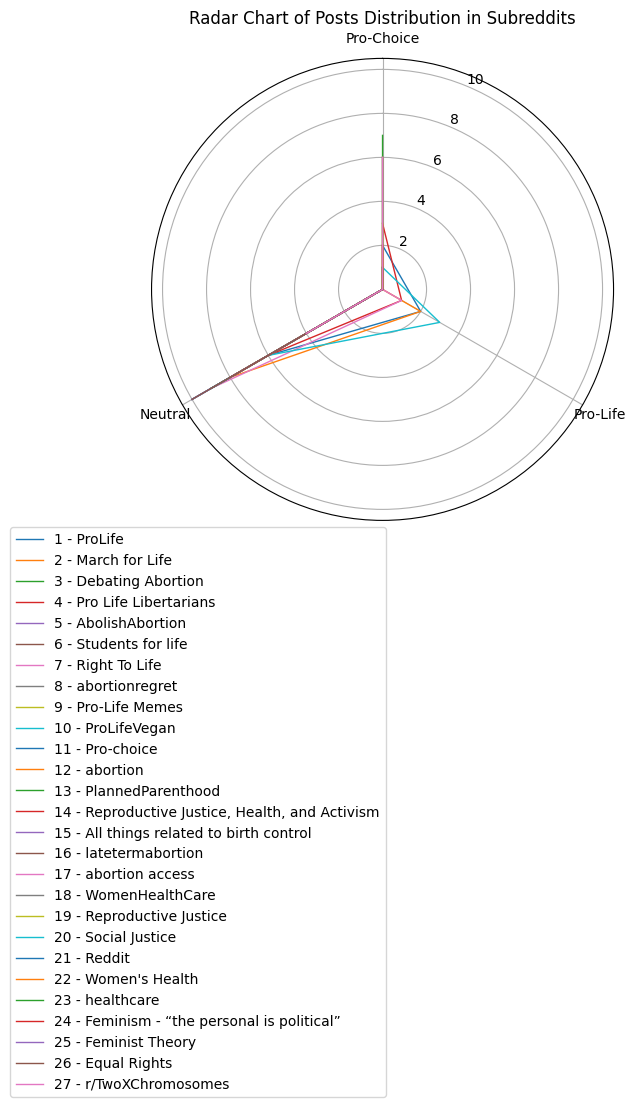

In [41]:
data=indSubData

subreddits = list(data.keys())
pro_choice_posts = np.array([value[0] for value in data.values()])
pro_life_posts = np.array([value[1] for value in data.values()])
neutral_posts = np.array([value[2] for value in data.values()])

# Radar Chart
labels = np.array(['Pro-Choice', 'Pro-Life', 'Neutral'])
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles, labels)

subreddit1=[]
i=1
for sub in subreddits:
    subreddit1.append(str(i)+" - "+sub.split(':',1)[0])
    i=i+1
print(subreddit1)

# Plot data
for i, subreddit in enumerate(subreddits):
    values = np.array(data[subreddit])
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=subreddit1[i])

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 0))
plt.title('Radar Chart of Posts Distribution in Subreddits')
plt.show()

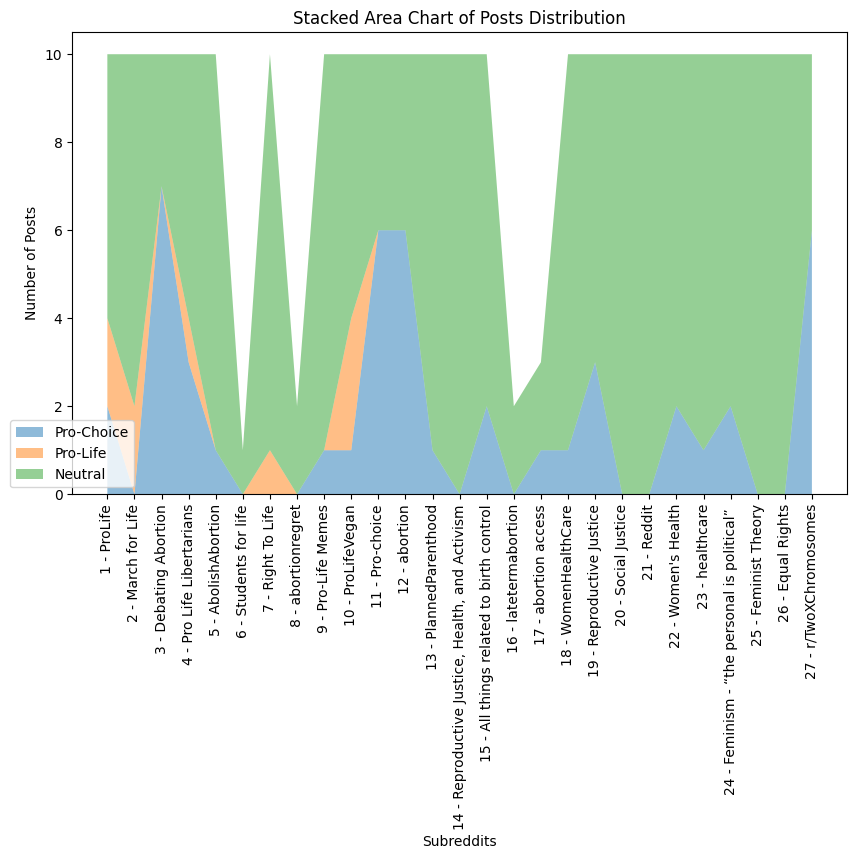

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

data_array = np.array([pro_choice_posts, pro_life_posts, neutral_posts])
data_array = data_array.T  # Transpose the array

ax.stackplot(subreddit1, data_array[:, 0], data_array[:, 1], data_array[:, 2], labels=['Pro-Choice', 'Pro-Life', 'Neutral'], alpha=0.5)
ax.legend(loc='lower center', bbox_to_anchor=(0, 0))
plt.xticks(rotation=90)
plt.title('Stacked Area Chart of Posts Distribution')
plt.xlabel('Subreddits')
plt.ylabel('Number of Posts')
# plt.tight_layout()
plt.show()

In [21]:
indSubData

{'ProLife': [2, 2, 6],
 'March for Life': [0, 2, 8],
 'Debating Abortion': [7, 0, 3],
 'Pro Life Libertarians': [3, 1, 6],
 'AbolishAbortion': [1, 0, 9],
 'Students for life': [0, 0, 1],
 'Right To Life': [0, 1, 9],
 'abortionregret': [0, 0, 2],
 'Pro-Life Memes': [1, 0, 9],
 'ProLifeVegan': [1, 3, 6],
 'Pro-choice': [6, 0, 4],
 'abortion': [6, 0, 4],
 'PlannedParenthood': [1, 0, 9],
 'Reproductive Justice, Health, and Activism': [0, 0, 10],
 'All things related to birth control': [2, 0, 8],
 'latetermabortion': [0, 0, 2],
 'abortion access': [1, 0, 2],
 'WomenHealthCare': [1, 0, 9],
 'Reproductive Justice': [3, 0, 7],
 'Social Justice': [0, 0, 10],
 'Reddit: Progressive': [0, 0, 10],
 "Women's Health: women's health news, questions and discussion": [2, 0, 8],
 'healthcare: systems, costs, problems and proposed solutions.': [1, 0, 9],
 'Feminism - “the personal is political” ': [2, 0, 8],
 'Feminist Theory': [0, 0, 10],
 'Equal Rights': [0, 0, 10],
 'r/TwoXChromosomes: You are the comm

In [ ]:
subreddit = reddit.subreddit('ProChoice')
for submission in subreddit.hot(limit=10):
        tok=submission.title
        print("main:\t"+tok)
        i=0
        for top_level_comment in submission.comments:
            tok=top_level_comment.body
            print(str(i)+"\tsecondary:\t"+tok)
            i+=1
            j=0
            for second_level_comment in top_level_comment.replies:
                tok=second_level_comment.body
                j+=1
                print("\t comment "+str(j)+": "+tok+"\n")

In [ ]:
data = []

for subr in combined_list:
    print(subr)
    subreddit = reddit.subreddit(subr)
    for submission in subreddit.hot(limit=10):
        for top_level_comment in submission.comments:
            top_level_data = {
                'Subreddit': subr,
                'Post Title': submission.title,
                'Post Body': submission.selftext,
                'Top-level Comment': top_level_comment.body
            }
            data.append(top_level_data)
            for second_level_comment in top_level_comment.replies:
                second_level_data = {
                    'Subreddit': subr,
                    'Post Title': submission.title,
                    'Post Body': submission.selftext,
                    'Top-level Comment': top_level_comment.body,
                    'Second-level Comment': second_level_comment.body
                }
                data.append(second_level_data)

# Create a DataFrame
df = pd.DataFrame(data)

# Save to Excel
df.to_excel('reddit_data.xlsx', index=False)

# Taking identified posts and checking for echo chambers

In [27]:
id_list = ["3g1jfi","vl7uxz","uo9q7x","j25kbw","jbexqi","kmrgeg","8xhnzb","6dv5t4","11ssx9c","12f2ju0","1250r33","12elkt9","12cr3t8","11wgoc1","12f47v7","128xuis","11vq7o8","11ynweh","111gs88","11y6n6y","zqgu59","xpg775","hqzaz5","11zuj6d"]
file = open('indiPost.txt', 'w+')
for id in id_list:
    try:
        submission = reddit.submission(id=id)
        print(submission.title)
        
        prof_post=0
        total=0
        choice=0
        life=0
        # print("Post",i,end=": ")
        # file.write("Post "+str(i)+": "+str(submission.permalink)+"\n")
        tok=submission.title
        if relevant_comment(tok):
            score=sentiment_score(tok[:514])
            total+=1
            if(score==3):
                choice+=1
            elif(score==2):
                life+=1
            if(profanity.contains_profanity(tok)):
                prof_post+=1
        # print(submission.author,":")
        submission.comments.replace_more(limit=None)
        
        for top_level_comment in submission.comments:
            tok=top_level_comment.body
            if relevant_comment(tok):
                score=sentiment_score(tok[:514])
                total+=1
                if(score==3):
                    choice+=1
                elif(score==2):
                    life+=1
                if(profanity.contains_profanity(tok)):
                    prof_post+=1
            # print("\t",top_level_comment.author)
            
            for second_level_comment in top_level_comment.replies:
                tok=second_level_comment.body
                if relevant_comment(tok):
                    score=sentiment_score(tok[:514])
                    total+=1
                    if(score==3):
                        choice+=1
                        prochoice_comments+=1
                    elif(score==2):
                        life+=1
                        prolife_comments+=1
                    else:
                        neutral_comments+=1
                    # if(profanity.contains_profanity(tok)):
                    #     prof_post+=1
        print(choice, life, total)
        # if (total!=0):
            # file.write(str(choice)+" "+str(life)+" "+str(total)+"\n")
        # i+=1
        if choice>1 and float(total-life)/(float(total)) > 0.8:
            # choice_echo+=1
            # prochoice_prof+=prof_post
            file.write(id+" : Pro-choice\n")
            print(id+" : Pro-choice\n")
        elif life>1 and float(total-choice)/(float(total)) > 0.8:
            # life_echo+=1
            # prolife_prof+=prof_post
            file.write(id+" : Pro-life\n")
            print(id+" : Pro-life\n")
        else:
            # non_echo+=1 
            # nonEcho_prof+=prof_post
            file.write(id+" : Mixed\n")
            print(id+" : Mixed\n")
    except Exception as e:
        continue
    # total_choice+=choice_echo
    # total_life+=life_echo
    # total_all+=life_echo+choice_echo+non_echo
    # print("Overall: ",choice_echo,life_echo,non_echo)
    # file.write("Overall: "+str(choice_echo)+" Pro-Choice echo chamber, " + str(life_echo)+" Pro-Life echo chambers, "+str(non_echo)+" No echo chambers\n\n")
        

file.close()

Buttons
0 0 4
3g1jfi : Mixed

"My body my choice" has been so harmful to the pro-choice movement
52 19 71
vl7uxz : Mixed

TIL that saying that coat hangers are important symbols for the pro-choice movement is “speaking over other activists”. Women should have a choice over how they protest, just like how they should have a choice about their own bodies.
5 0 5
uo9q7x : Pro-choice

Women charged police lines and threw Molotov cocktails at officers in Mexico City during protests demanding the legalization of abortion in the majority Roman Catholic country. The protesters, clad in the green bandanas that have become the symbol of the pro-choice movement in Latin America
42 22 70
j25kbw : Mixed

The Pro-Choice Movement Finds an Under-Recognized Ally: Religious Groups — Many communities of faith view abortion as a ‘moral option,’ not a mortal sin.
13 6 21
jbexqi : Mixed

In a few hours the Argentine Senate will vote for the legalization of abortion (green is the color of the pro-choice movem

In [ ]:
print(total_choice,total_life,total_all)
print(prochoice_comments,prolife_comments,neutral_comments)
print(prochoice_prof,prolife_prof,nonEcho_prof)

86 0 21


In [ ]:
print()

In [ ]:
import matplotlib.pyplot as plt

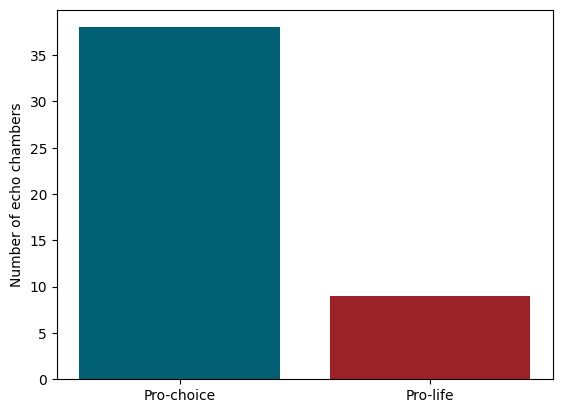

In [ ]:
plt.bar(["Pro-choice","Pro-life"],[total_choice, total_life],color=["#005f73","#9b2226"])
plt.ylabel("Number of echo chambers")
# make this pretty
plt.show()

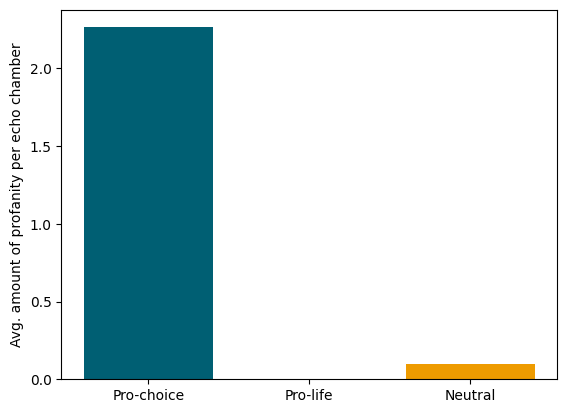

In [ ]:
plt.bar(["Pro-choice","Pro-life","Neutral"],[prochoice_prof/total_choice, prolife_prof/total_life,nonEcho_prof/(total_all-(total_choice+total_life))],color=["#005f73","#9b2226","#ee9b00"])
plt.ylabel("Avg. amount of profanity per echo chamber")
plt.show()